<img src="assets/stackexchange.png" width="350" style="margin-left:auto; margin-right:auto" />
<h1><center>Project: Popular Data Science Questions</center></h1>

#### Project Objective
In this scenario, we are tasked with analyzing the `Stack Exchange` [Data Science](https://datascience.stackexchange.com) platform to determine the most relevant topics for a data science education company's content creation efforts. `Stack Exchange` hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. We aim to identify high-demand subjects based on user interest within the data science community.


#### Data Science Stack Exchangen (DSSE)
**What kind of questions are welcome on this site?**

Stack overflow is a website for questions and answers related to programming languages and topics. On DSSE's [help center's](https://datascience.stackexchange.com/help/asking) section on questions, we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal. In the help center we also learned that in addition to the sites mentioned in the learn section, there are other two sites that are relevant:

- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

**What, other than questions, does the site's [home](https://datascience.stackexchange.com) subdivide into?**

DSSE's structure encompasses various sections including `Questions`, `Tags`, `Users`, `Companies` and `Unanswered`. Each section provides unique insights into the community's activities and interests, facilitating our analysis of user preferences and topic popularity. The `Home` tab does illustrate the newest questions, the other sections are presented below:

- [Questions](https://datascience.stackexchange.com/questions): Shows all questions asked, by default ordered by newest question. Additionally we can see `tags` for each question, like `python`, `deep-learning`, `nlp` etc., the user, who asked the question plus reputation score. Questions can be filtered by many conditions.

- [Tags](https://datascience.stackexchange.com/tags): The tags section shows the used tags (keywords or labels that categorize questions), the count of questions who ever used this specific tag and the count of questions who used this tag last week or month. We can filter tags by popularity, name or time.

<img src="assets/tags_1.png" width="700" style="margin-left:auto; margin-right:auto" />

- [Users](https://datascience.stackexchange.com/users): The users section shows all users of the DSSE community. By default ordered by the reputation of the user this week. Additionally, below the reputation score, there are tags, which idicates the fields of knowledge of every user.

- [Companies](https://stackoverflow.com/jobs/companies): On the companies section, you can learn about what it's like to work at the listed companies and also can take the opportunity to appply for jobs.

- [Unanswered](https://datascience.stackexchange.com/unanswered): This section is a collection of unanswered questions.

The tagging system employed by Stack Exchange appears to be well-suited for addressing our analytical objectives, as it enables quantification of the frequency of questions related to specific subjects. Additionally, our exploration of the help center reveals that Stack Exchange sites are heavily moderated by the community. This gives us some confidence in using the tagging system to derive conclusions.

**What information is available in each post?**

Information, that are available for each posts, are the following:

For both questions and answers:
- The posts's score
- The posts's title
- The posts's author
- The posts's body

For questions only:
- How many users have it on their 
- The last time the question as active
- How many times the question was viewed
- Related questions
- The question's tags

#### The Data

Stack Exchange offers a public database accessible through the [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new) (SEDE). SEDE utilizes `Transact-SQL` for querying data from `Stack Exchange` websites, enabling us to extract relevant insights for our analysis. ou can read more about Stack Exchange Data Explorer (SEDE) on its [help](https://data.stackexchange.com/help) section and on this tutorial [link](https://data.stackexchange.com/tutorial).

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*
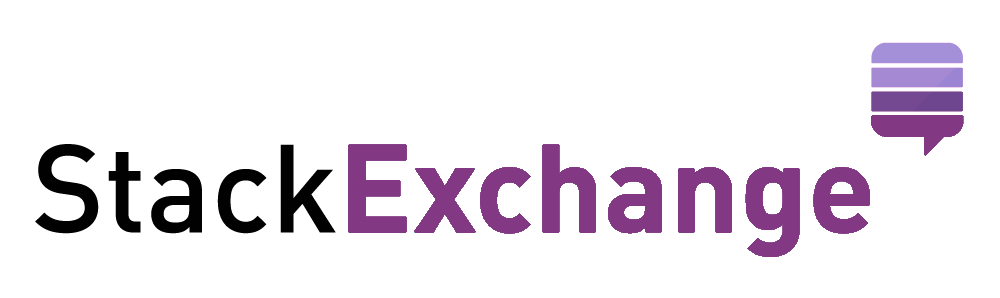
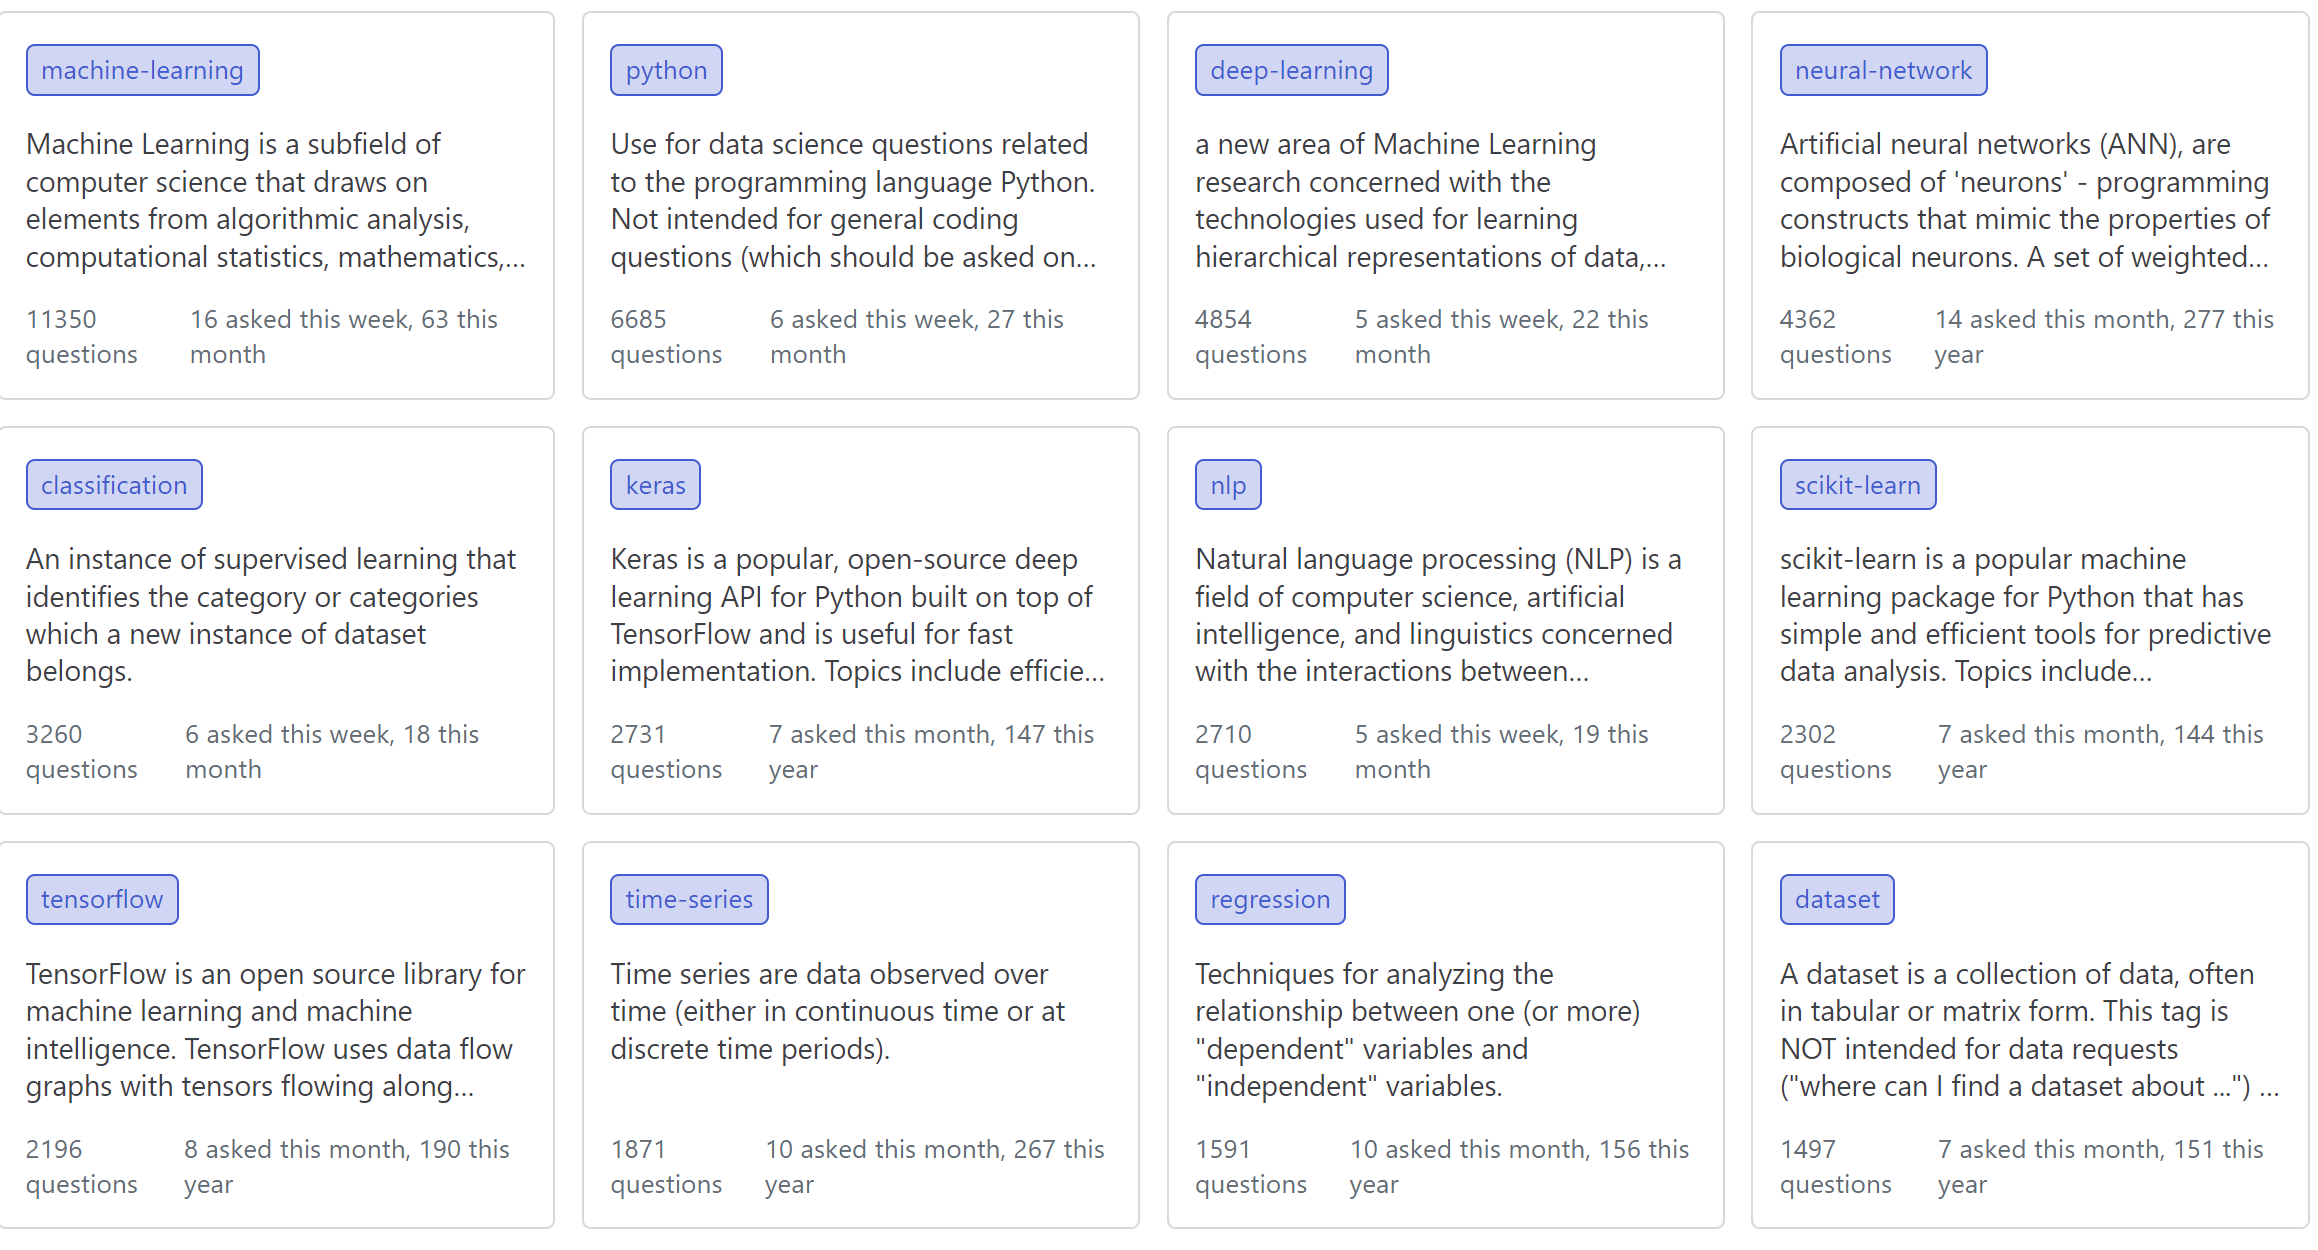

#### Examining the Data

Upon examining the table names, a few appear relevant to our goal:

- `Posts`
- `PostTags`
- `Tags`
- `TagSynonyms`
  
After a couple of exploratory queries, we conclude, that our focus should be on the `Posts` table. While the `Tags` table initially seemed promising by indicating tag usage frequency, it does not provide context to discern recent versus historical interest in these tags.

Using the following code, we examined the `Tags` table. The most used `tag` (at the time of the query) was `machine-learning`.

```sql
SELECT TOP 10 Id, TagName, Count
  FROM Tags
 ORDER BY Count DESC;
```

| ID         | TagName   |     Count |
|------------|-----------|-----------|
|2	         |machine-learning |11346|
|46	         |python            |6683|
|194         |deep-learning     |4853|
|81	         |neural-network    |4362|
|77	         |classification    |3259|
|324         |keras             |2731|
|47	         |nlp               |2709|
|128         |scikit-learn      |2301|
|321         |tensorflow        |2196|
|72	         |time-series       |1870|

Below, we present the key columns of the `Posts` table relevant to our inquiry.

- `Id`: An identification number for the post.
- `PostTypeId`: An identification number for the type of post.
- `CreationDate`: The date and time of creation of the post.
- `Score`: The post's score.
- `ViewCount`: How many times the post was viewed.
- `Tags`: What tags were used.
- `AnswerCount`: How many answers the question got (only applicable to question posts).
- `FavoriteCount`: How many times the question was favored (only applicable to question posts).

The last few columns contain information about how popular the post is, which is the kind of information we need.





#### Further Data Examination

There exist eight distinct `post types`. Before delving into their relevance to our analysis, let's first determine the count of each `post type`.





```sql
SELECT PostTypeId, COUNT(*) AS num_posts
  FROM Posts
 GROUP BY PostTypeId
 ORDER BY num_posts DESC;
```
 
 The result of this query is shown in the table below:

 | PostTypeId | num_posts |
|------------|-----------|
| 2          | 41198     |
| 1          | 36701     |
| 4          | 333       |
| 5          | 333       |
| 6          | 14        |
| 7          | 1         |

Given their low occurrence, any `post type` other than `questions` (1) or `answers` (2) is mostly unimportant. Even if such posts were exceptionally popular, they would represent outliers and hold limited relevance to our analysis. Consequently, since `questions` seem to be more interesting at the beginning, we'll just focus on the `questions`. 

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2023. (At the time of writing it is early 2024).





#### Getting the Data

To get the relevant data we run the following query.

```sql
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, 
       AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2023;
```

#### Data Exploration

We read the data into a pandas dataframe and make sure `CreationDate` will be stored as a datetime object.


In [1]:
# Import the relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Set visualization parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
# Create pandas dataframe
questions_2023 = pd.read_csv('questions_2023.csv', parse_dates=['CreationDate'])

# Show first 5 rows
questions_2023.head(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,117435,1,2023-01-01 03:32:10,0,48,<nlp><feature-selection><feature-engineering><...,1,NaN
1,117436,1,2023-01-01 11:42:00,0,75,<deep-learning><time-series><convolutional-neu...,1,NaN
2,117439,1,2023-01-01 12:54:09,0,2017,<neural-network><keras><tensorflow><convolutio...,0,NaN
3,117444,1,2023-01-02 01:14:52,6,5377,<nlp><gpu><language-model><memory>,1,NaN
4,117447,1,2023-01-02 05:52:18,1,71,<python><pytorch><computer-vision><torchvision>,1,NaN


In [3]:
questions_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             3432 non-null   int64         
 1   PostTypeId     3432 non-null   int64         
 2   CreationDate   3432 non-null   datetime64[ns]
 3   Score          3432 non-null   int64         
 4   ViewCount      3432 non-null   int64         
 5   Tags           3432 non-null   object        
 6   AnswerCount    3432 non-null   int64         
 7   FavoriteCount  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 214.6+ KB


As we can see above, except the `FavoriteCount` column, we have no missing values in the other columns. Since `FavoriteCount` does not have any values, which means, that non of the questions is marked as favorite, we could think about dropping this column or we can replace the missing values with zero. 

The data types appear appropriate for each column. However, once we address the missing values in  `FavoriteCount`, there is no need to retain the values as `floats`. Given that the `object` dtype encompasses various types, let's examine the specific types of objects within the `Tags` column of the questions dataset.

Lets dive into it!

In [4]:
# Examing tags column by type
questions_2023["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We observe that each value in this column is a string. On `Stack Exchange`, each question is limited to a maximum of five `tags`, suggesting a potential approach of creating five separate columns in the `questions` dataset labeled `Tag1` through `Tag5` and assigning the corresponding tags to each row.

However, this method does not facilitate the comparison of tags across different `questions`. Therefore, we will retain the `tags` as a list within a single column.

#### Data Cleaning

First we'll begin with cleaning the `FavoriteCount` column.


In [5]:
# Fill na values with 0 in favoriteCount column
questions_2023.fillna(value={"FavoriteCount": 0}, inplace=True)

# Transform FavoriteCount column to int
questions_2023["FavoriteCount"] = questions_2023["FavoriteCount"].astype(int)

# Check dtypes of columns
questions_2023.dtypes

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Now, we'll clean the `Tags` column.


In [6]:
# Transform tags column, use astype(str) to avoid error
questions_2023['Tags'] = questions_2023['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')

# Show sample values 
questions_2023.sample(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
338,118351,1,2023-02-07 13:47:35,0,11,"[metric, research]",0,0
1316,121208,1,2023-04-28 06:57:42,1,77,[huggingface],0,0
2648,123825,1,2023-09-23 19:18:58,0,45,"[machine-learning, class-imbalance, accuracy, ...",1,0
699,120000,1,2023-03-06 14:40:03,0,16,"[deep-learning, semantic-segmentation]",0,0
1487,121575,1,2023-05-16 15:02:03,0,10,"[statistics, mathematics]",0,0


#### Most Viewed and Most Used 

Now, we shift our attention towards identifying the most popular `tags`. This analysis involves two distinct measures of popularity: firstly, we'll count the frequency of each `tag's` usage, and secondly, we'll quantify the number of views garnered by `questions` tagged with each respective `tag`.

While other metrics such as the `score` or inclusion in a user's list of `favorite questions` are also noteworthy approaches for exploration, we'll focus our current investigation to the `counts` and `views`.

In [7]:
# Create a dictionary
tag_count = {}

# Use a for loop to store each tag + count to the dictionary
for tags in questions_2023['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
# Create a pandas df from dictionary
tag_count = pd.DataFrame().from_dict(tag_count, orient='index', columns=['tag_count'])

# Sort values by tag_count, descending, first 20 tags
top_tag_count = tag_count.sort_values(by='tag_count', ascending=False).head(20)
top_tag_count

,tag_count
machine-learning,891
python,509
deep-learning,437
nlp,333
neural-network,281
time-series,267
classification,222
tensorflow,205
pytorch,177
transformer,157


The selection of the threshold value of 20 is somewhat arbitrary and subject to experimentation with alternative values. However, it's observed that the popularity of `tags` declines rapidly beyond this threshold. Therefore, examining `tags` meeting this criterion should be enough to assist us in reach our objective. Let's proceed to visualize this data.






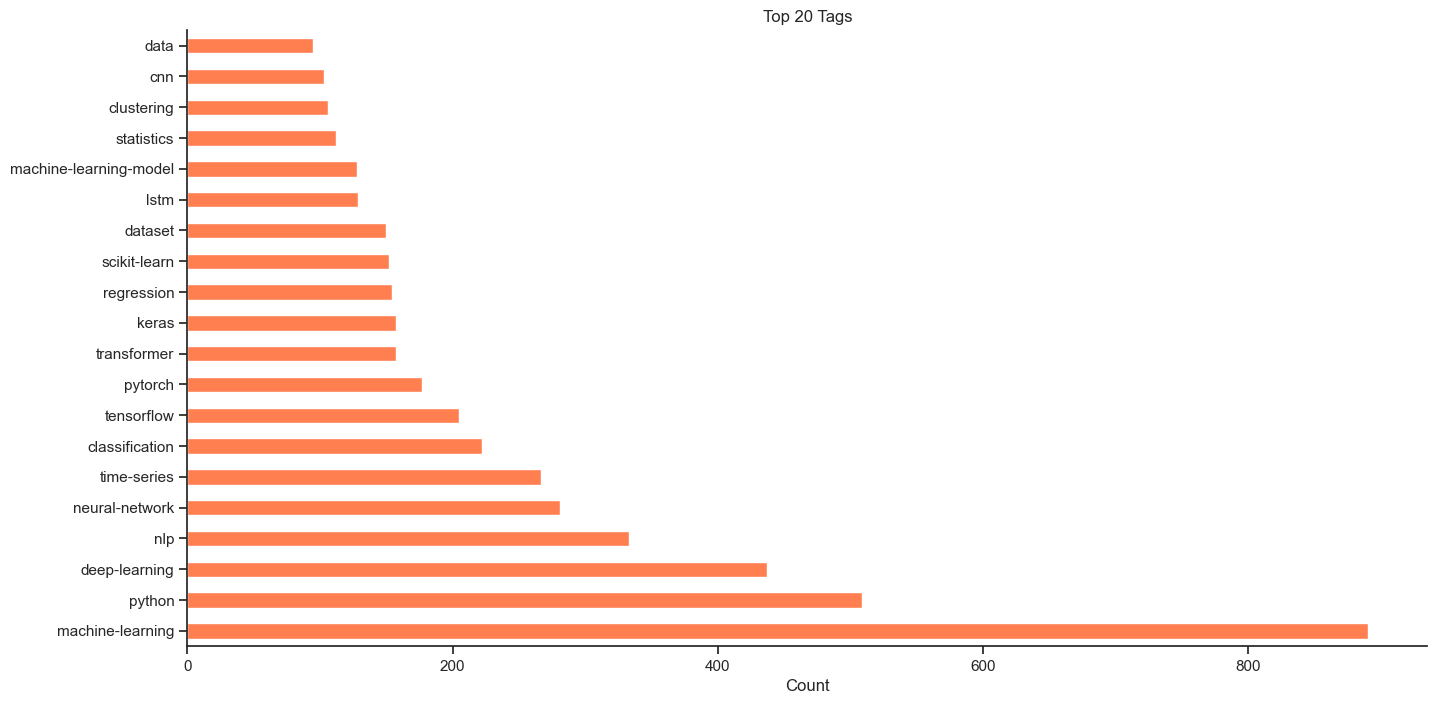

In [9]:
# Create horizontal barplot for top 20 tags
top_tag_count.plot(kind='barh', figsize=(16,8), title='Top 20 Tags', 
                   xlabel='Count', color='coral', legend=False)

plt.show()

Certain tags are very broad and are unlikely to provide actionable insights; examples include `python`, `dataset`, or `data`. Before delving deeper into tag analysis, let's repeat the same process for views.

In [10]:
# Create a dictionary for views
tag_views = {}

# Use a for loop to count the views
for i, tags in enumerate(questions_2023['Tags']):
    for tag in tags:
        if tag in tag_views:
            tag_views[tag] += questions_2023['ViewCount'].iloc[i]
        else:
            tag_views[tag] = questions_2023['ViewCount'].iloc[i]

In [11]:
# Create a pandas df from dictionary
tag_views = pd.DataFrame().from_dict(tag_views, orient='index', columns=['view_count'])

# Sort values by view_count, descending, first 20 tags
top_tag_views = tag_views.sort_values(by='view_count', ascending=False).head(20)

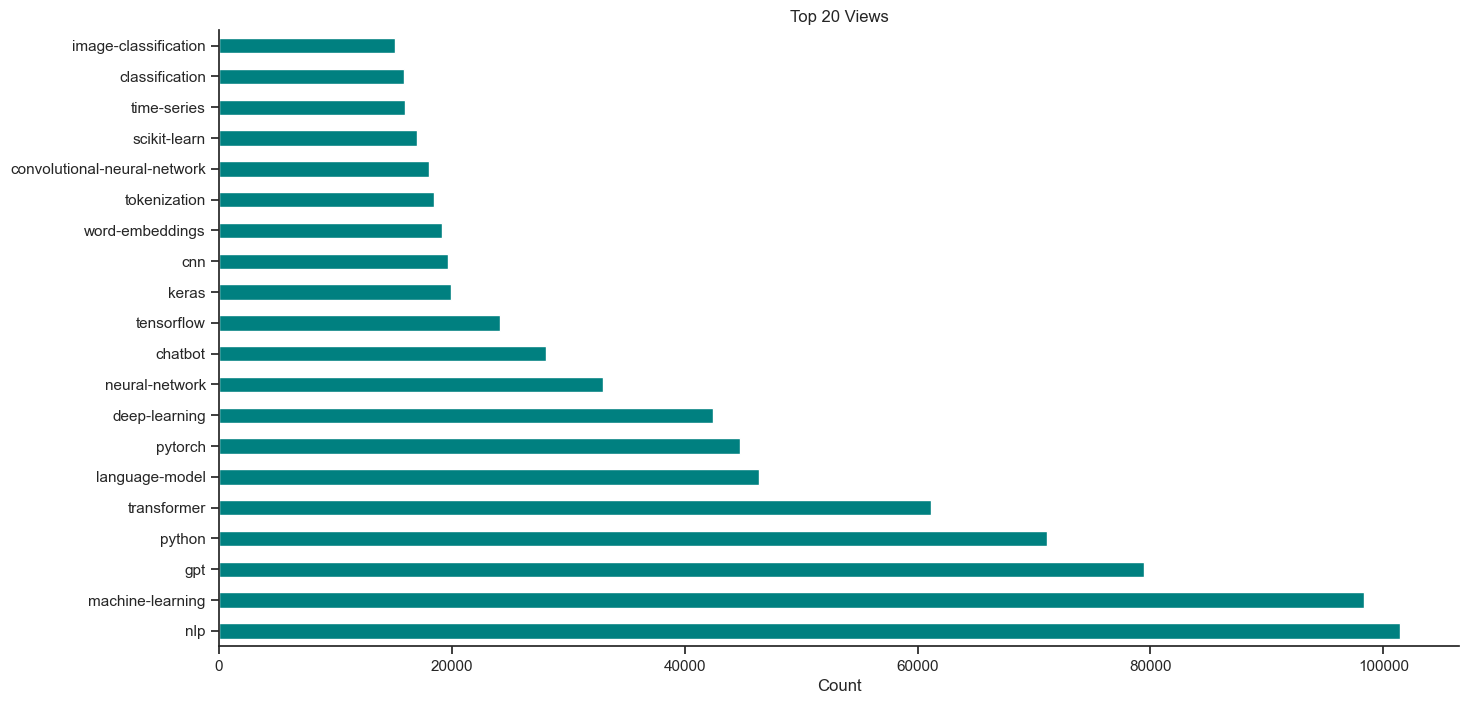

In [12]:
# Create horizontal barplot for top 20 views
top_tag_views.plot(kind='barh', figsize=(16,8), title='Top 20 Views', 
                   xlabel='Count', color='teal', legend=False)

plt.show()

Lets look at the graphs side by side

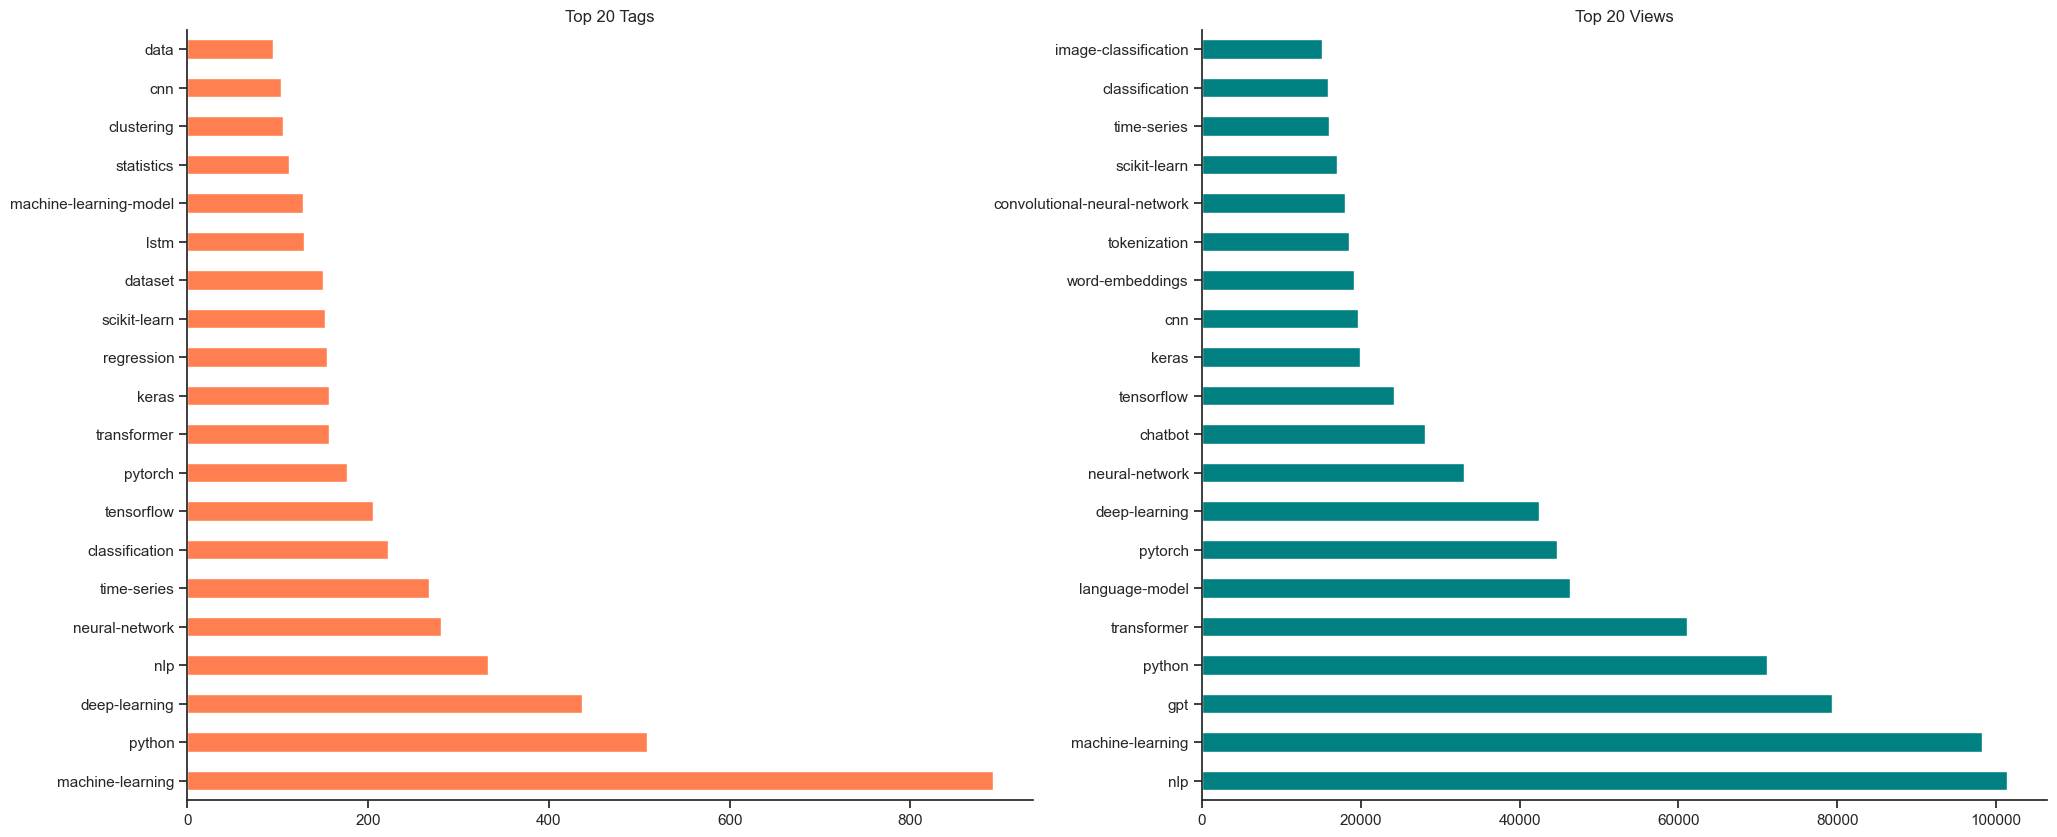

In [13]:
# Set figure, axes, figsize
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((24, 10))

# Create two horizontal barplots (1)
top_tag_count.plot(kind="barh", ax=axes[0], subplots=True, legend=False, color='coral')
axes[0].set_title('Top 20 Tags')

# Create two horizontal barplots (2)
top_tag_views.plot(kind="barh", ax=axes[1], subplots=True, legend=False, color='teal')
axes[1].set_title('Top 20 Views')

plt.show()

#### Relations Between Tags (1)

Examining the outcomes from the two bar plots, we observe that the majority of top tags appear in both datasets. Let's inspect the tags present in `top_tag_count` but absent in `top_tag_views`. These can be identified by the absence of values in the `view_count` column below.

In [14]:
# Merge two dataframes, how=left, sort by tag_count descending
in_used = pd.merge(top_tag_count, top_tag_views, how='left', left_index=True, right_index=True)
in_used.sort_values(by='tag_count', ascending=False)

,tag_count,view_count
machine-learning,891,98308.0
python,509,71124.0
deep-learning,437,42391.0
nlp,333,101418.0
neural-network,281,32971.0
time-series,267,15952.0
classification,222,15928.0
tensorflow,205,24166.0
pytorch,177,44757.0
keras,157,19931.0


In [15]:
# Merge two dataframes, how=right, sort by tag_count descending
in_viewed  = pd.merge(top_tag_count, top_tag_views, how='right', left_index=True, right_index=True)
in_viewed .sort_values(by='view_count', ascending=False)

,tag_count,view_count
nlp,333.0,101418
machine-learning,891.0,98308
gpt,NaN,79410
python,509.0,71124
transformer,157.0,61113
language-model,NaN,46394
pytorch,177.0,44757
deep-learning,437.0,42391
neural-network,281.0,32971
chatbot,NaN,28097


The tags present in `top_tag_count` and not present in `top_view_count` are:
    
* regression
* dataset
* lstm
* machine-learning-model
* statistics
* clustering
* data

And the tags present in `top_tag_count` but not in `top_view_count` are:

* gpt
* language-model
* chatbot
* tokenization
* word-embeddings
* convolutional-neural-network
* image-classification

Certain `tags` exhibit associations with each other. For instance, `python` is correlated with `pandas` since both terms are commonly faced together due to their association with `Python` programming language - specifically, `pandas` being a `Python` library. Therefore, discussing `pandas` can effectively address two tags concurrently. Conversely, Other pairs of tags, shouldn't be related at all, like `pandas` and `r`.






In [16]:
# Apply lambda function to tags column, show rows with r and pandas
questions_2023[questions_2023["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount


No results. This means, that we do not have any tag combination of `R` and `Pandas`, which is a good sign.

#### Relations Between Tags (2)

*The section related to 'Relations Between Tags (2)' was created using the course instructions*

One approach to assess the relationship between pairs of `tags` involves counting the frequency of each pair appearing together. Let's initiate this process by list of all tags.

In [17]:
# Sace all tag names to all_tags
all_tags = list(tag_count.index)

We will proceed by constructing a dataframe where each row and column represents a tag, similar to the following structure:






In [18]:
# Create a dataframe where index and column are the tag names
overlaps = pd.DataFrame(index=all_tags, columns=all_tags)

# Show the first four columns and rows
overlaps.iloc[0:4,0:4]

,nlp,feature-selection,feature-engineering,feature-extraction
nlp,NaN,NaN,NaN,NaN
feature-selection,NaN,NaN,NaN,NaN
feature-engineering,NaN,NaN,NaN,NaN
feature-extraction,NaN,NaN,NaN,NaN


We will initialize this dataframe with zeroes. Then, for each list of `tags` in the `Tags` column of the questions dataframe, we will increment the corresponding cells in the dataframe by one. This process will yield a dataframe where each pair of tags indicates how frequently they were used together.






In [19]:
overlaps.fillna(0, inplace=True)

for tags in questions_2023["Tags"]:
    overlaps.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

This dataframe contains a considerable amount of data. Let's narrow our focus to the most frequently used `tags`. We'll introduce some color coding to highlight key elements and make it easier to capture the strongest `tag` combination.






In [20]:
overlaps_most_used = overlaps.loc[top_tag_count.index, top_tag_count.index]

def cell_style(x):
    assist_df = pd.DataFrame('', index=x.index, columns=x.columns)
    assist_df.loc["machine-learning", "deep-learning"] = "background-color: orange"
    assist_df.loc["deep-learning", "machine-learning"] = "background-color: orange"
    for k in range(assist_df.shape[0]):
        assist_df.iloc[k,k] = "color: red"
    
    return assist_df

overlaps_most_used.style.apply(cell_style, axis=None)

,machine-learning,python,deep-learning,nlp,neural-network,time-series,classification,tensorflow,pytorch,transformer,keras,regression,scikit-learn,dataset,lstm,machine-learning-model,statistics,clustering,cnn,data
machine-learning,891,122,141,74,98,68,85,45,39,24,32,52,40,37,25,56,40,30,19,17
python,122,509,52,31,32,34,23,46,42,7,44,25,45,14,20,13,12,14,12,13
deep-learning,141,52,437,63,78,34,25,54,52,43,40,15,2,12,24,17,4,4,29,5
nlp,74,31,63,333,15,3,12,9,16,59,2,2,4,10,9,9,0,4,1,1
neural-network,98,32,78,15,281,16,13,32,31,12,33,14,3,8,16,10,2,3,13,5
time-series,68,34,34,3,16,267,17,13,7,9,8,29,8,6,56,13,10,6,3,5
classification,85,23,25,12,13,17,222,7,4,7,10,10,10,14,7,11,3,9,10,4
tensorflow,45,46,54,9,32,13,7,205,11,4,83,3,2,5,18,5,1,1,22,0
pytorch,39,42,52,16,31,7,4,11,177,18,1,1,0,3,9,2,1,1,3,1
transformer,24,7,43,59,12,9,7,4,18,157,3,3,0,3,6,1,0,1,1,0


The highlighted cells in orange (use jupyterlab to show colors) indicate that `deep-learning` and `machine-learning` were used together 141 times. The `red` values represent the frequency of each `tag's` usage. As previously observed, `machine-learning` was used 891 times, which is confirm by this dataframe.

Interpreting this dataframe manually is challenging due to its size and complexity. To improve visualization, let's generate a heatmap. However, to avoid skewing the colors, we'll first remove the values highlighted in `blue`.

In [21]:
# Transform value for e.g. python and python to NaN
for i in range(overlaps_most_used.shape[0]):
    overlaps_most_used.iloc[i,i] = np.NaN

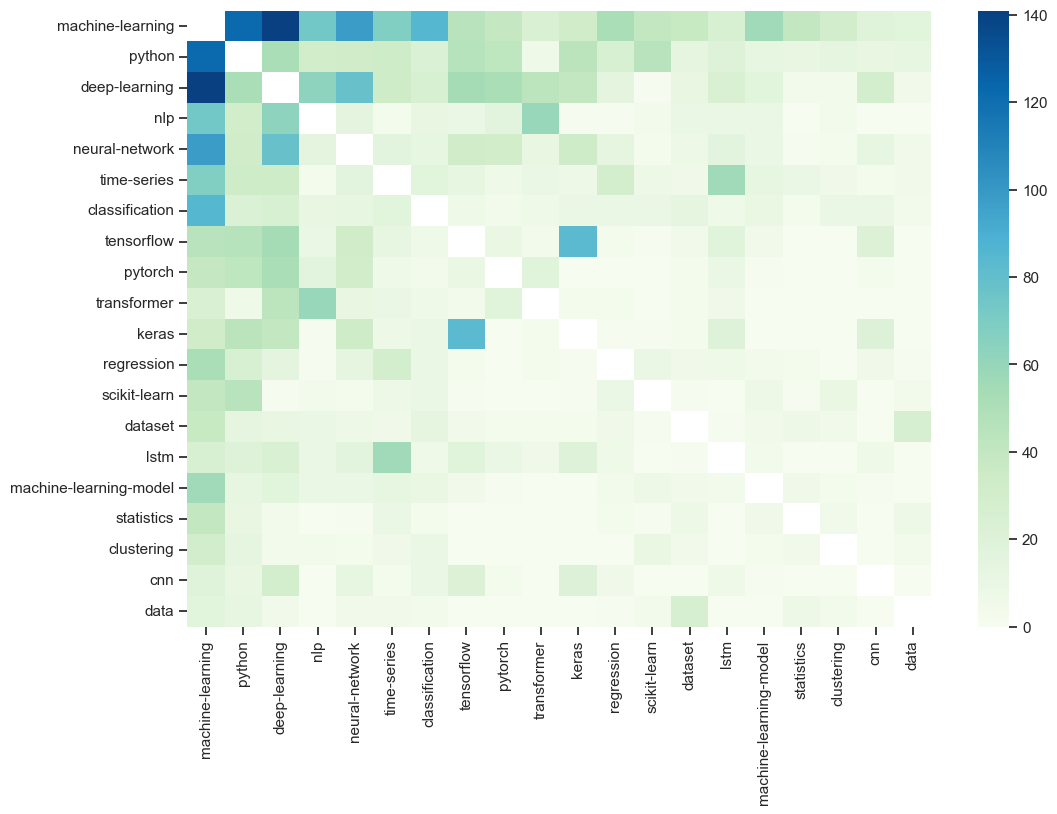

In [22]:
# Adjust figure size
plt.figure(figsize=(12,8))

# Create heatmap
sns.heatmap(overlaps_most_used, cmap="GnBu", annot=False)

plt.show()

The most frequently used tags show apparent strong relationships, evident from the dense concentration observed in the top left corner of the `heatmap`. However, this `correlation` could primarily come from the high individual usage of these `tags`, resulting in their frequent co-occurrence without necessarily indicating a significant relationship between them.

To illustrate this concept intuitively, consider the following analogy: Many people buy bread, and many buy toilet paper, leading to their frequent purchase together. However, buying one item does not necessarily influence the likelihood of purchasing the other.

Another limitation of this approach is its focus solely on pairs of `tags`, neglecting potential relationships among multiple groups of `tags`. For instance, it's plausible that while used together, `dataset` and `scikit-learn` are strongly associated with `pandas`, but each tag individually may not exhibit such a relationship.

To address these issues, we can use `association rules`, a potent `data mining` technique. `Association rules` enable us to identify analytical relationships like "customers who purchase milk also tend to purchase eggs." Furthermore, we can quantify the strength of these relationships based on their frequency, significance, and independence. While the complexity of `association rules` is beyond the scope of this project, exploring this technique further holds significant potential for future analysis.

#### Domain Knowledge

While there are indeed analytical solutions for the problem presented in the previous section, they may not always be necessary or the optimal approach for addressing the problem at hand. [Domain knowledge](https://en.wikipedia.org/wiki/Domain_knowledge) can be very useful here.

Observing the overlap between the top 10 `tag_count` and the top 10 `tag_views`, we identify six common tags:

- `machine-learning`
- `python`
- `deep-learning`
- `nlp` (natural language processing)
- `neural-network`
- `pytorch`

These tags collectively represent a significant portion of the data science domain. For instance, `Python` serves as the primary programming language in `data science`, while `PyTorch`, a machine learning framework built on the `Python Torch library`, finds applications in areas such as computer vision and `natural language processing` (NLP). `NLP` is an interdisciplinary field bridging computer science and linguistics, while `neural networks` form a fundamental component of `machine learning`, particularly in `deep learning` algorithms.

The majority of the top tags are linked to a central theme in `machine learning`, namely, `deep learning`. For a more refined recommendation, we could propose generating content in the realm of `Python` that leverages `deep learning` techniques, especially for addressing classification problems and related variations.

A quick assessment by someone with sufficient `domain knowledge` would reveal that, based on our analysis, the popular subject matter currently revolves around `deep learning`.

#### Is deep learning just a fad?

Lets look at another dataframe which contains questions on the DSSE from ~mid 2014 to December 2023. We will track the interest in deep learning across time, and answer the following questions:

Let's examine another dataframe consist of `questions` from the `DSSE` spanning approximately from mid-2014 to December 2023. Our objective is to monitor the trends in interest surrounding `deep learning` over time and address the following inquiries:

* How many `deep learning` questions are asked per time period?
* The `total` amount of `questions` per time period?
* How many `deep learning` `questions` are there relative to the `total` amount of `questions` per time period?

We'll use the following query to get the data we need:

```sql
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

Let's read in the file into a dataframe called `all_questions`. We'll parse the dates at read-time and use the same technique as before to clean the `Tags` column.



In [23]:
# Read in the dataframe
all_questions = pd.read_csv('all_questions.csv', parse_dates=["CreationDate"])

# Clean the tags column
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')

# Check dataframe first five columns
all_questions.head()

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,[machine-learning]
1,7,2014-05-14 00:11:06,"[education, open-source]"
2,14,2014-05-14 01:25:59,"[data-mining, definitions]"
3,15,2014-05-14 01:41:23,[databases]
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"


Which questions should be categorized as `deep learning`? We'll consider all questions containing the `tags`: `lstm`, `cnn`, `scikit-learn`, `tensorflow`, `keras`, `neural-network`, and `deep-learning` related to the domain of `deep learning`. Additionally, if a question includes a `tag` related to `deep learning` alongside other `tags`, we will classify it as `deep learning`-related.

Given that the data science and technology landscape evolves relatively slowly, not warranting daily, weekly, or even monthly monitoring, we will track developments on a `quarterly` basis. As we lack complete data for the first quarter of 2024, we will exclude dates falling within that period.

In [24]:
# Exclude data of 2024
all_questions_to_23 = all_questions[all_questions['CreationDate'].dt.year < 2024]

In [25]:
# Check values, sort descending for creation date.
all_questions_to_23.sort_values(by='CreationDate', ascending=False)

,Id,CreationDate,Tags
31447,126235,2023-12-31 12:50:34,"[time-series, forecasting]"
31446,126234,2023-12-31 07:21:42,"[machine-learning, algorithms, association-rules]"
31445,126232,2023-12-30 23:20:51,[optimization]
31444,126230,2023-12-30 19:37:11,"[machine-learning, neural-network, pytorch]"
31443,126229,2023-12-30 17:27:01,"[python, pandas]"
...,...,...,...
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"
3,15,2014-05-14 01:41:23,[databases]
2,14,2014-05-14 01:25:59,"[data-mining, definitions]"
1,7,2014-05-14 00:11:06,"[education, open-source]"


There are 36492 questions. Now lets filter for `deep-learning` related questions. We'll now create a function that assigns 1 to `deep learning` questions and 0 otherwise.

In [26]:
# Create function which return 1 for deep learning tag and 0 for other
def dl_tag(tags):
    for tag in tags:
        if tag in ["neural-network", "cnn", 
                   "scikit-learn", "keras", "lstm" 
                   "tensorflow", "deep-learning"]:
            return 1
    return 0

# Create copy to avoid SettingWithCopyWarning
all_questions_copy = all_questions_to_23.copy()

# Use function on tags column, create new column deep_learning
all_questions_copy["deep_learning"] = all_questions_copy["Tags"].apply(dl_tag)

# Show sample data
all_questions_copy.sample(5)

,Id,CreationDate,Tags,deep_learning
19679,116750,2022-12-05 05:34:20,"[machine-learning, classification, gaussian, g...",0
25420,24214,2017-10-31 09:39:50,"[neural-network, deep-learning, regression, da...",1
16991,80480,2020-08-19 01:04:53,[explainable-ai],0
25247,24069,2017-10-25 12:25:16,"[topic-model, lda]",0
23200,86145,2020-11-30 23:22:48,"[pipelines, ann, rfe]",0


#### Development over time in deep-learning questions

We will monitor the evolution of the `deep learning` topic on a quarterly basis. To facilitate this analysis, we will create a column that indicates the `quarter` in which each question was posted.





In [27]:
# Create a function, that calculates the year and quarter of the given date
def quarter(datetime):
    year = str(datetime.year)[-2:] #extract last 2 digits from year
    quarter = str(((datetime.month-1) // 3) + 1) #alculate the quarter
    return "{y}Q{q}".format(y=year, q=quarter) #return year + quarter

# Apply the above function to creationdate
all_questions_copy["quarter"] = all_questions_copy["CreationDate"].apply(quarter)

# Check new column
all_questions_copy.head()

,Id,CreationDate,Tags,deep_learning,quarter
0,5,2014-05-13 23:58:30,[machine-learning],0,14Q2
1,7,2014-05-14 00:11:06,"[education, open-source]",0,14Q2
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",0,14Q2
3,15,2014-05-14 01:41:23,[databases],0,14Q2
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0,14Q2


In the final phase of this analysis, we will group the data by quarter. After that, we'll:

- Calculate the total number of questions related to `deep learning`.
- Calculate the total number of questions.
- Compute the ratio of `deep learning` questions to the total number of questions.

In [28]:
# Group by quarter, calculate aggregation 'sum' (DL-questions)' and 'size' (All-questions)
quarterly = all_questions_copy.groupby('quarter').agg({"deep_learning": ['sum', 'size']}) 

# Rename columns 
quarterly.columns = ['dl_questions', 'total_questions']

#calculate deep-learning rate
quarterly["dl_rate"] = quarterly["dl_questions"]/quarterly["total_questions"] 

# Reset index
quarterly.reset_index(inplace=True)

# Check new dataframe
quarterly.sample(5)

,quarter,dl_questions,total_questions,dl_rate
30,21Q4,258,1016,0.253937
28,21Q2,489,1386,0.352814
14,17Q4,329,887,0.370913
9,16Q3,152,574,0.264808
25,20Q3,506,1430,0.353846


Lastly, we will visualize the `rate` of `deep_learning` questions alongside the `total amount` of questions in a single chart:





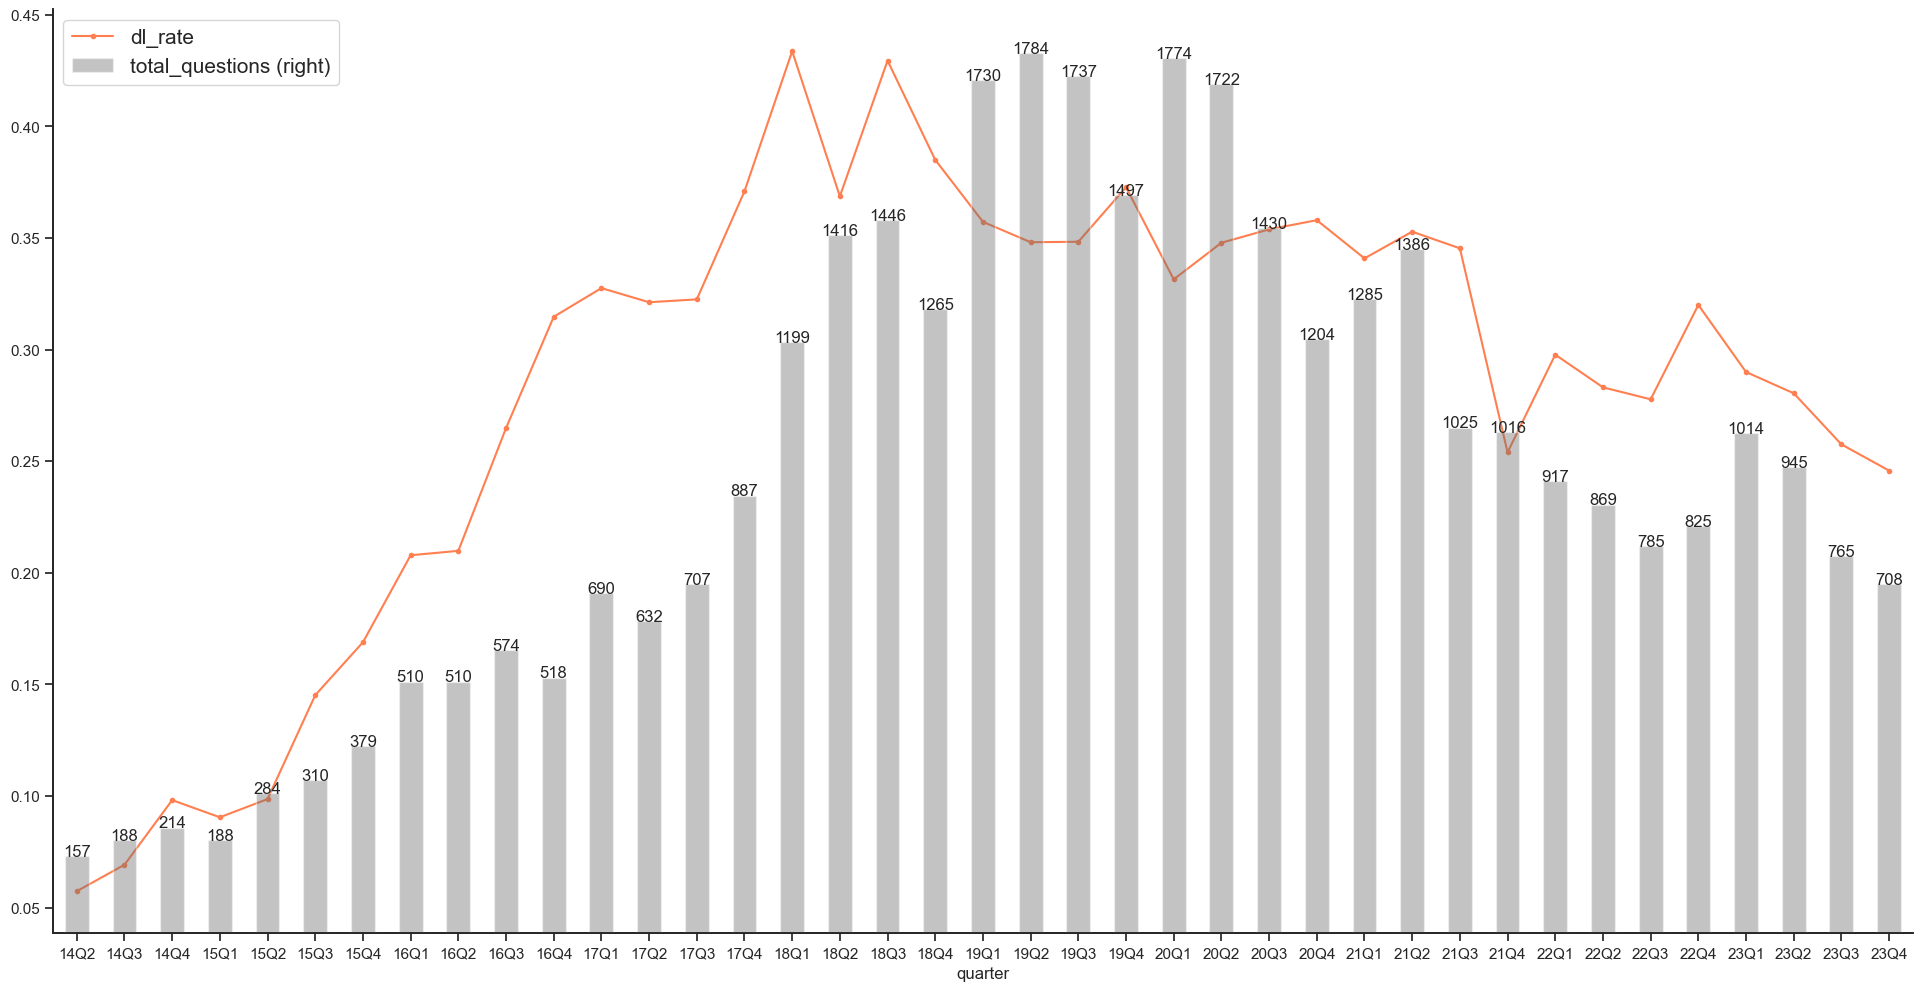

In [29]:
# Create the first visualization, illustrates the deep learning rate as lineplot
ax1 = quarterly.plot('quarter', 'dl_rate',
                    kind='line', linestyle='solid', marker='.', color='coral',
                    figsize=(24,12)
                    )

# Create the second visualization, illustrates the total amount of questions as barplot
ax2 = quarterly.plot('quarter', 'total_questions',
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.4, rot=0, color='dimgray')

# Set labels to barplot
for idx, t in quarterly['total_questions'].items():
    ax2.text(idx, t, str(t), ha='center', va='baseline')
xlims = ax1.get_xlim()

# Remove the default legend
ax1.get_legend().remove()

# Extract legend labels from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Set legend with extracted values from axes
ax1.legend(handles=h1 + h2,
           labels=l1 + l2,
           loc='upper left', prop={'size': 15})

# Remove right and top tick params
for ax in (ax1, ax2):
    for where in ('top', 'right'):
        ax.tick_params(right=False, labelright=False)

plt.show()

#### Conclusion

What insights can we derive from the above visualization? In Q1 2018, the `deep learning` rate stands at approximately 45%, indicating that nearly half of all questions were related to `deep learning`, a notably high proportion. This rate has exhibited a fluctuating trend over time, with a consistent increase observed since 14Q2, albeit with minor fluctuations such as a slight decrease in 15Q1. The peak occurred in 18Q1, where the `deep learning` rate reached its highest point. Subsequently, the rate began to decline, displaying sporadic fluctuations. In the most recent quarter, 23Q4, the `deep learning`-related question rate was around 25%.

The grey bars represent the total number of questions in each respective quarter. For instance, in Q1 of 2018, there were 1199 questions, out of which approximately 540 were related to `deep learning`.

Analyzing the latest quarter, we observe that one in every four questions relate to `deep learning`, still take a substantial portion. However, this proportion has decreased compared to the peak in 2018, possibly indicating a slight decline in interest in `deep learning` or the emergence of additional topics leading to a reduction in the share of `deep learning`-related questions. In addition to the decline in questions related to `deep learning`, there has been an overall reduction in the total number of questions. This trend may signify a broader shift affecting various `data science` topics, not solely limited to `deep learning`.

Although there appears to be a declining trend or potential negative influence from other factors, the substantial 25% share suggests that creating `deep learning` content remains relevant. Nonetheless, it's necessary to monitor the trend further.